# Human Activity Recognition with Sensor Data using Machine Learning

## About the dataset

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

Description of experiment:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

Attribute information:

- For each record in the dataset the following is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

- Triaxial Angular velocity from the gyroscope.

- A 561-feature vector with time and frequency domain variables.

- Its activity label.

- An identifier of the subject who carried out the experiment.

In [100]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [101]:
# Reading the data 
df = pd.read_csv('train.csv')

In [102]:
# First 5 rows of data
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [103]:
# Total rows and columns in data
df.shape

(7352, 563)

There are 563 columns and 7352 rows present in the data

In [104]:
# Columns present in data
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [105]:
# Column datatypes
df.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [107]:
# unique values of column Activity
print(df['Activity'].unique())
print(df['Activity'].nunique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
6


In [108]:
# Sum of all null values
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Here we can see there no null values present in the data

In [109]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [110]:
df.describe(include=['O']).T

,count,unique,top,freq
Activity,7352,6,LAYING,1407


In [111]:
# Separating the continuous and categorical columns for data visualization
cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

In [112]:
cont_columns , cat_columns

(Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
        'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
        'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
        'tBodyAcc-max()-X',
        ...
        'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
        'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
        'angle(tBodyGyroMean,gravityMean)',
        'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
        'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
       dtype='object', length=562),
 Index(['Activity'], dtype='object'))

In [113]:
# Unique values in categorical columns
for i in cat_columns:
    print('For column',i,'unique values are: ',df[i].unique())
    print('For column',i,'count of unique values are: ',df[i].nunique(),'\n\n')

For column Activity unique values are:  ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
For column Activity count of unique values are:  6 




In [114]:
# Sum of values
for i in cat_columns:
    print('For column --',i,'-- value counts are: \n',df[i].value_counts(),'\n\n')

For column -- Activity -- value counts are: 
 Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64 




In [115]:
# sum of duplicated values (if any)
sum(df.duplicated())

0

There are also no duplicate values present in the data

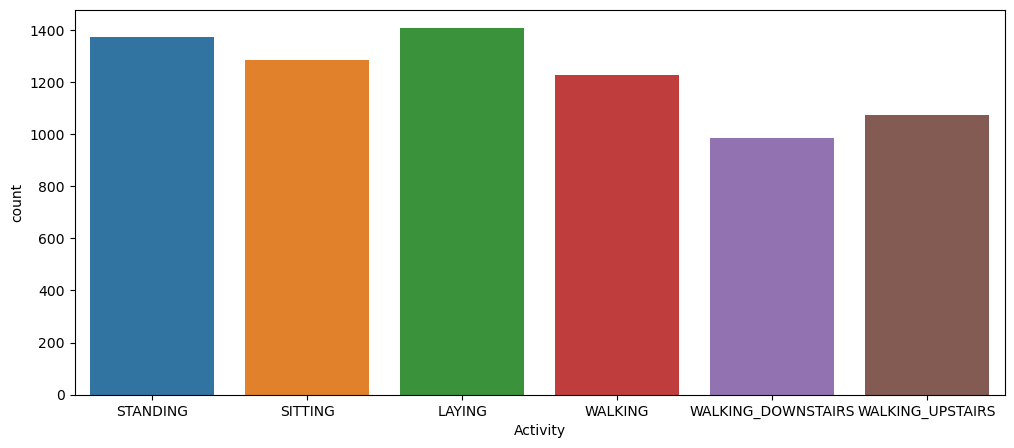

In [116]:
# COUNTPLOT

for i in cat_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.countplot(x=df[i],data=df)

From here we can see that the most activity done by all people was laying and following that is standing.

In [117]:
# Length of continuous columns
len(cont_columns)

562

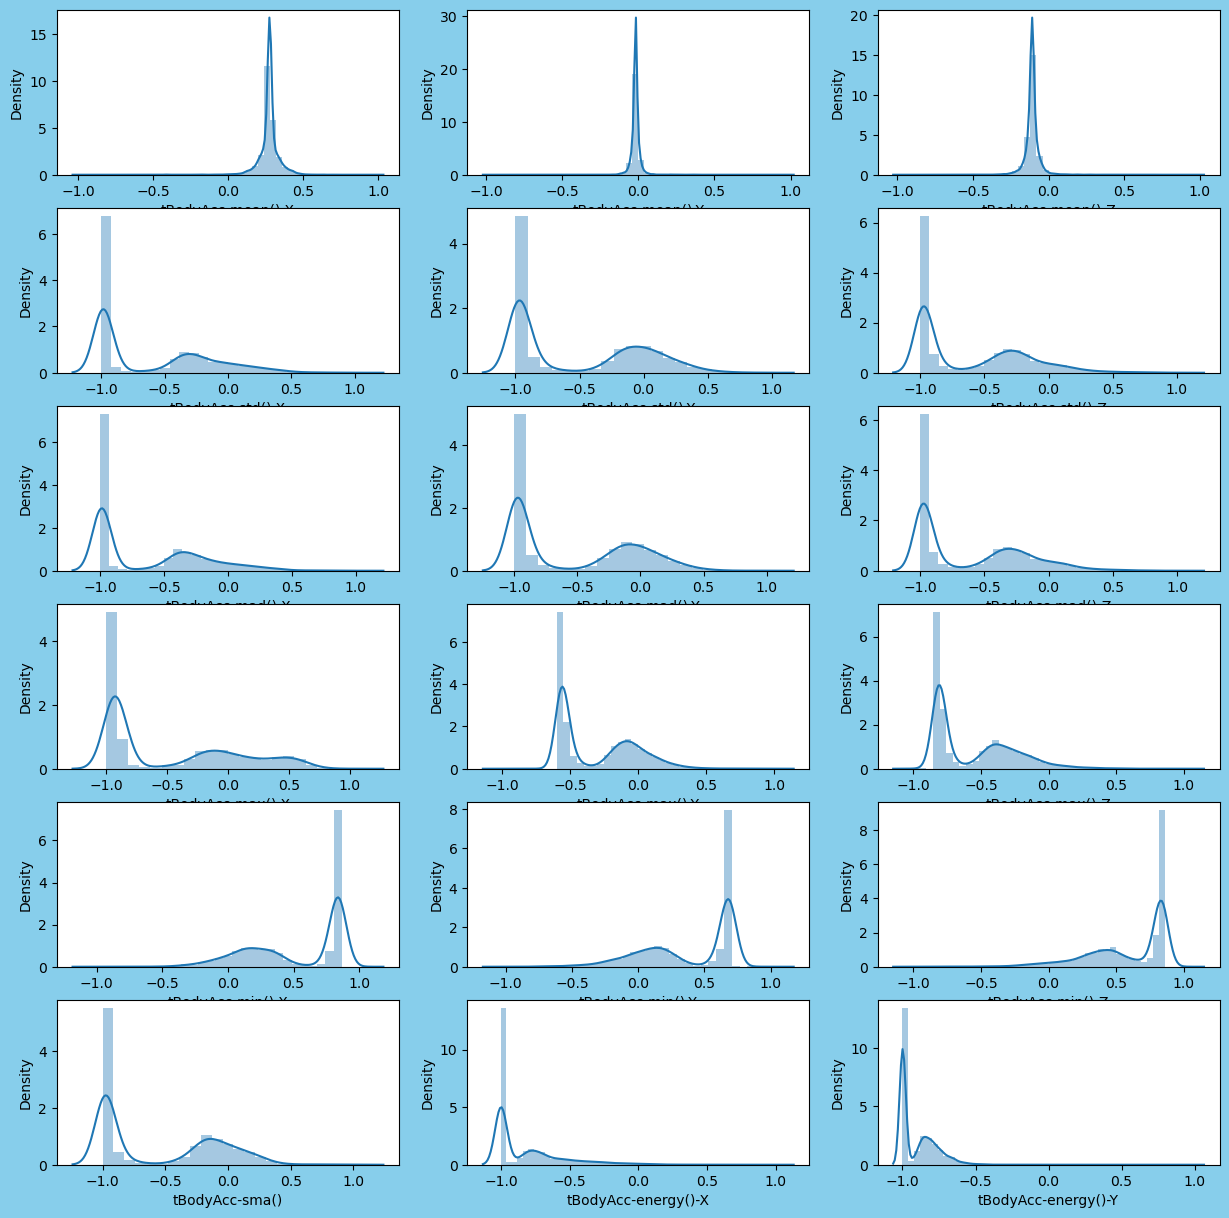

In [118]:
# Checking the distribution of continuous variables:

plt.figure(figsize=(15,15),facecolor='skyblue')
plotnumber = 1
for column in cont_data.columns:
    if plotnumber <= 18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber += 1
plt.show()

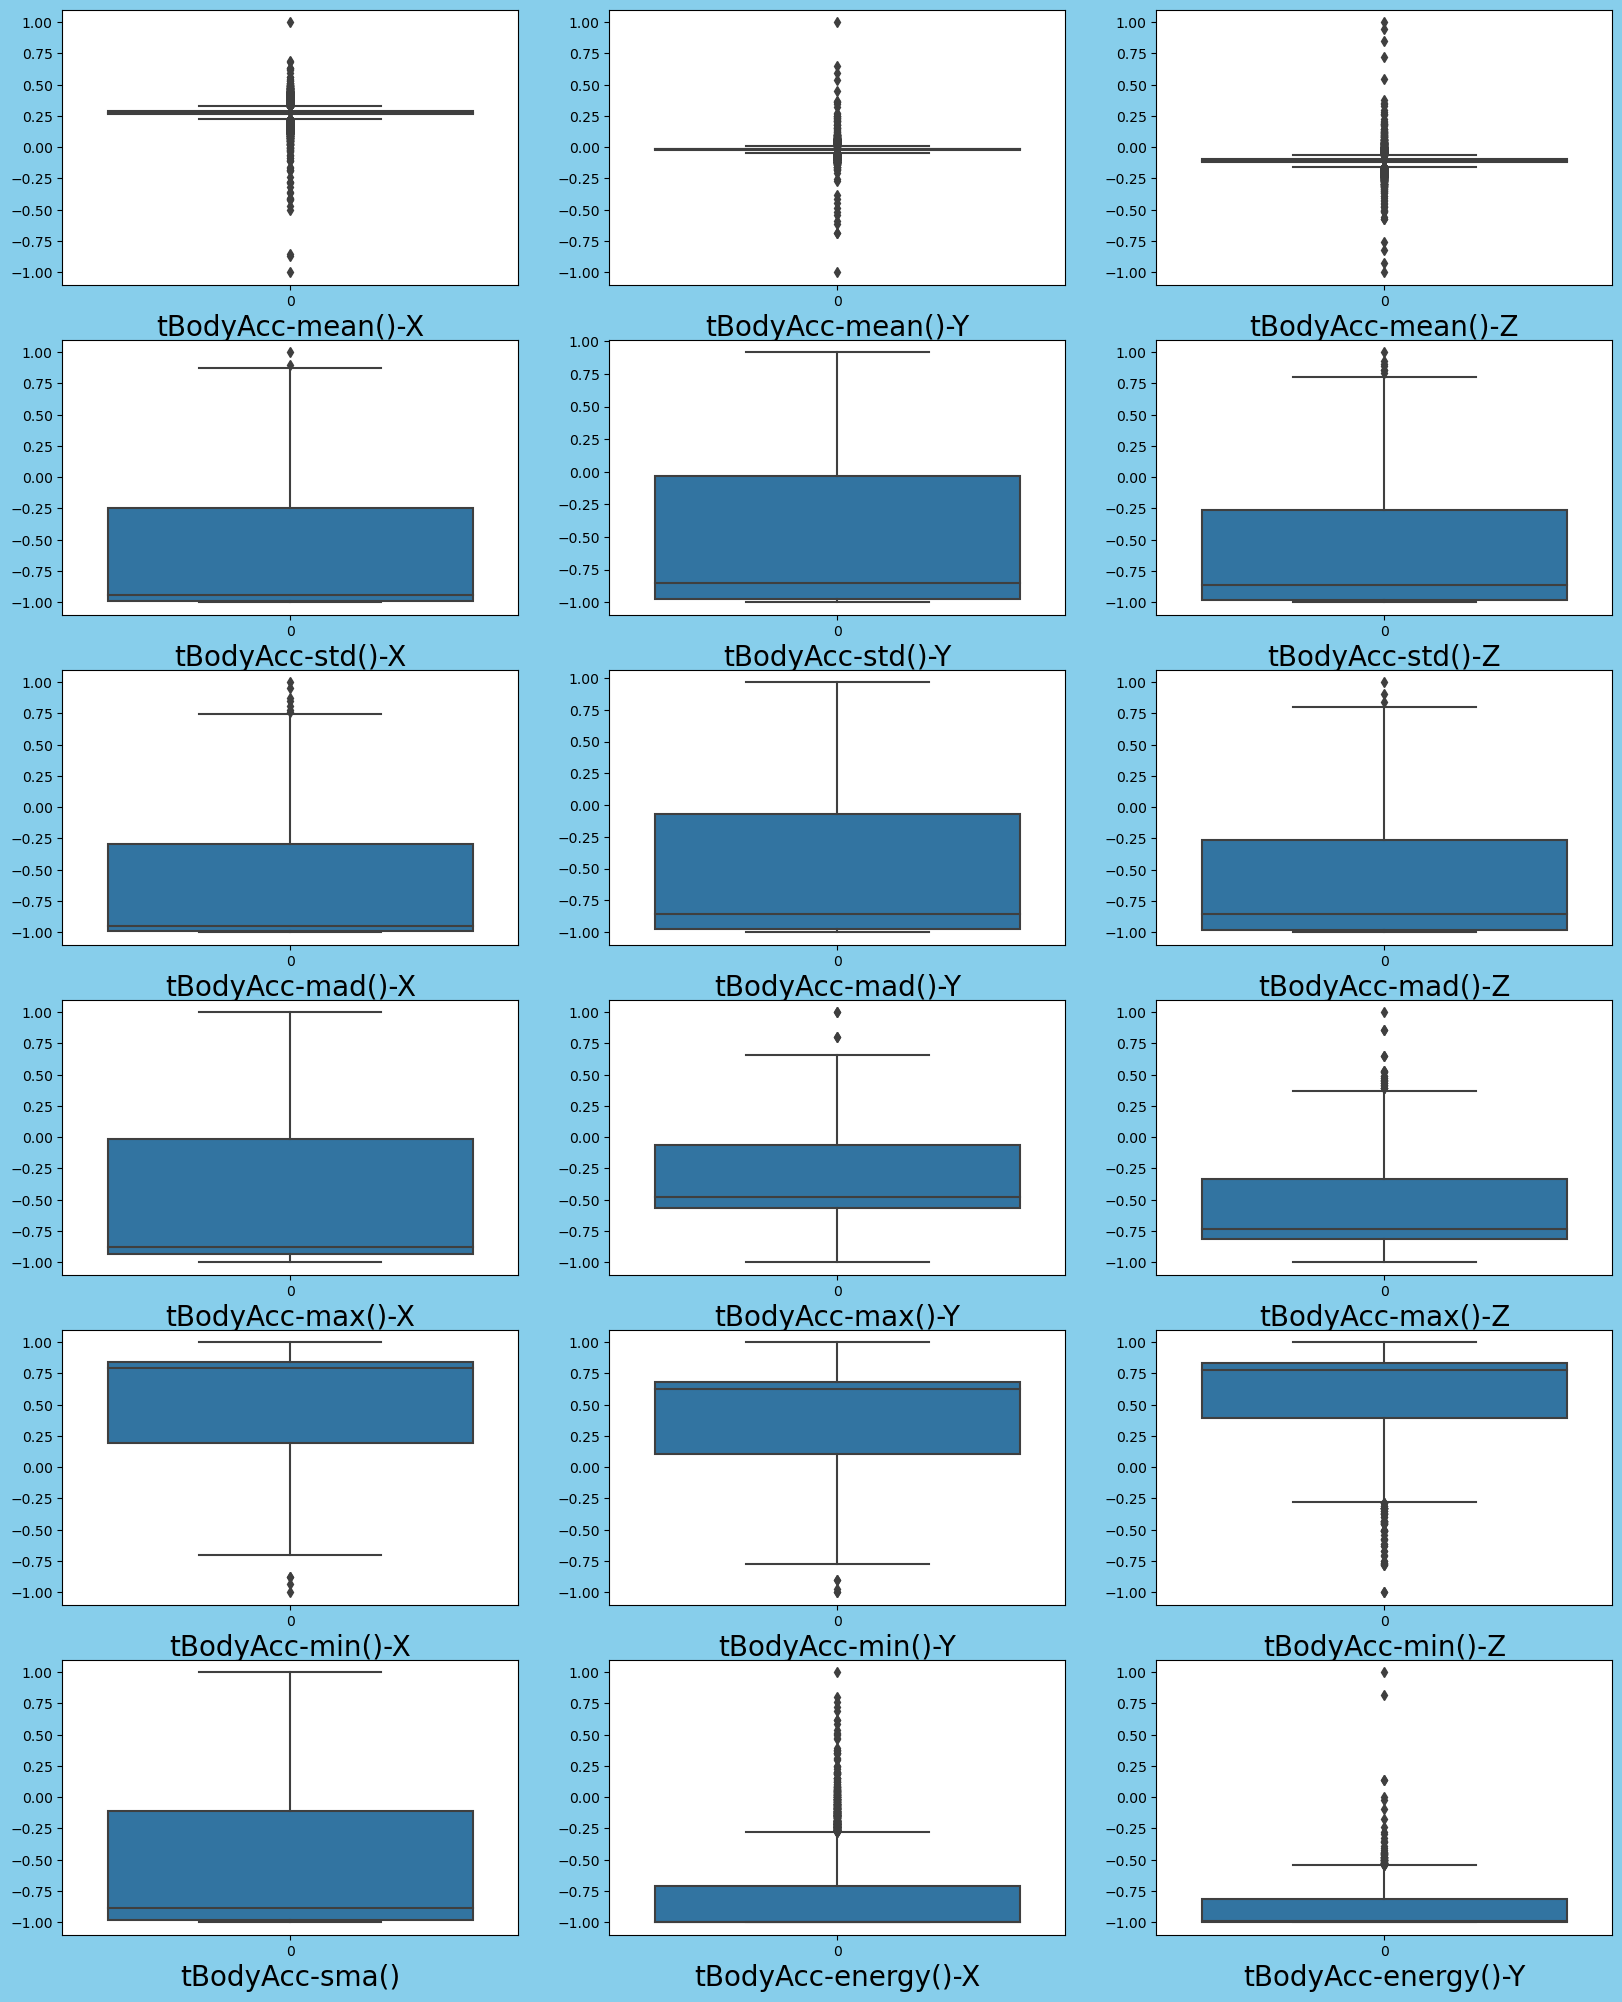

In [119]:
# Boxplot of some columns
plt.figure(figsize=(20,25),facecolor='skyblue')
plotnumber = 1
for col in df[cont_columns]:
    if plotnumber <= 18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber += 1
plt.show()

In [120]:
cont_columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

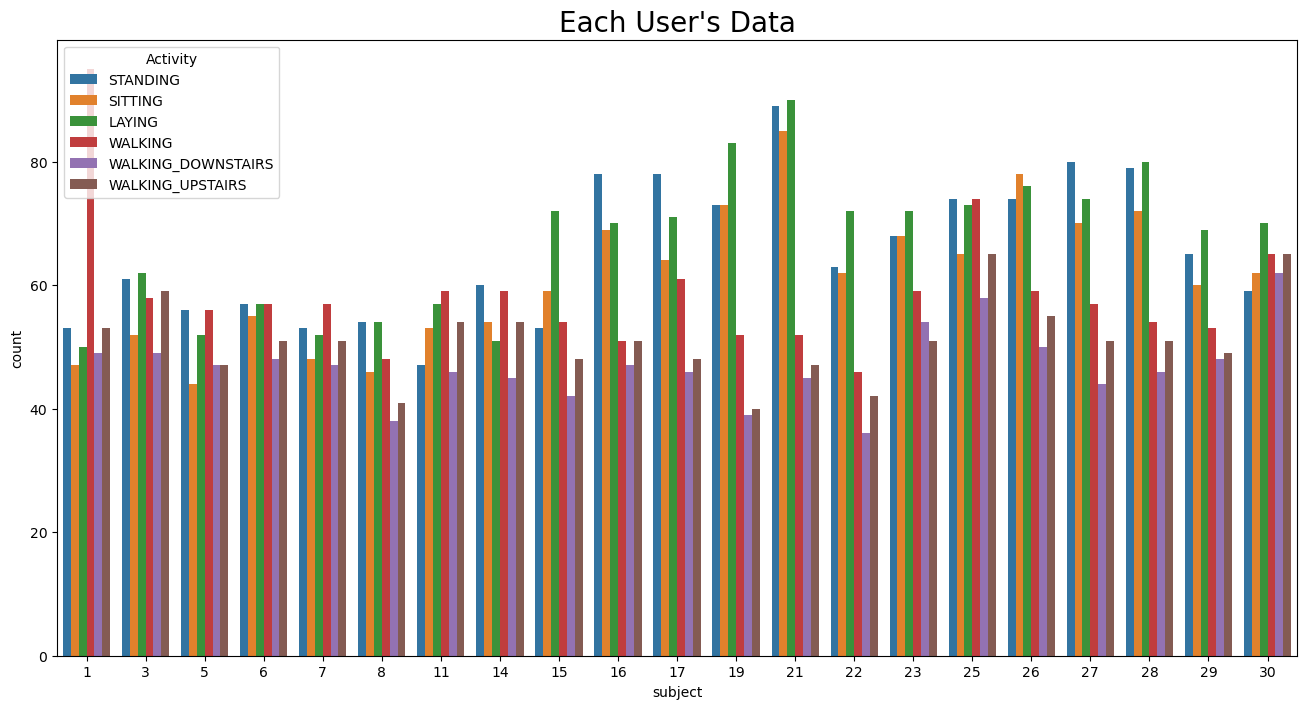

In [121]:
#Countplot of each user

plt.figure(figsize=(16,8))
plt.title("Each User's Data", fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

From here we can conclude that participant no 21 has the highest tenure for standing and laying in the data whereas participant no 1 has the highest tenure for walking.

In [122]:
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing
# Encode categorical variables: 'Activity'
label_encoder = LabelEncoder()
df['Activity'] = label_encoder.fit_transform(df['Activity'])

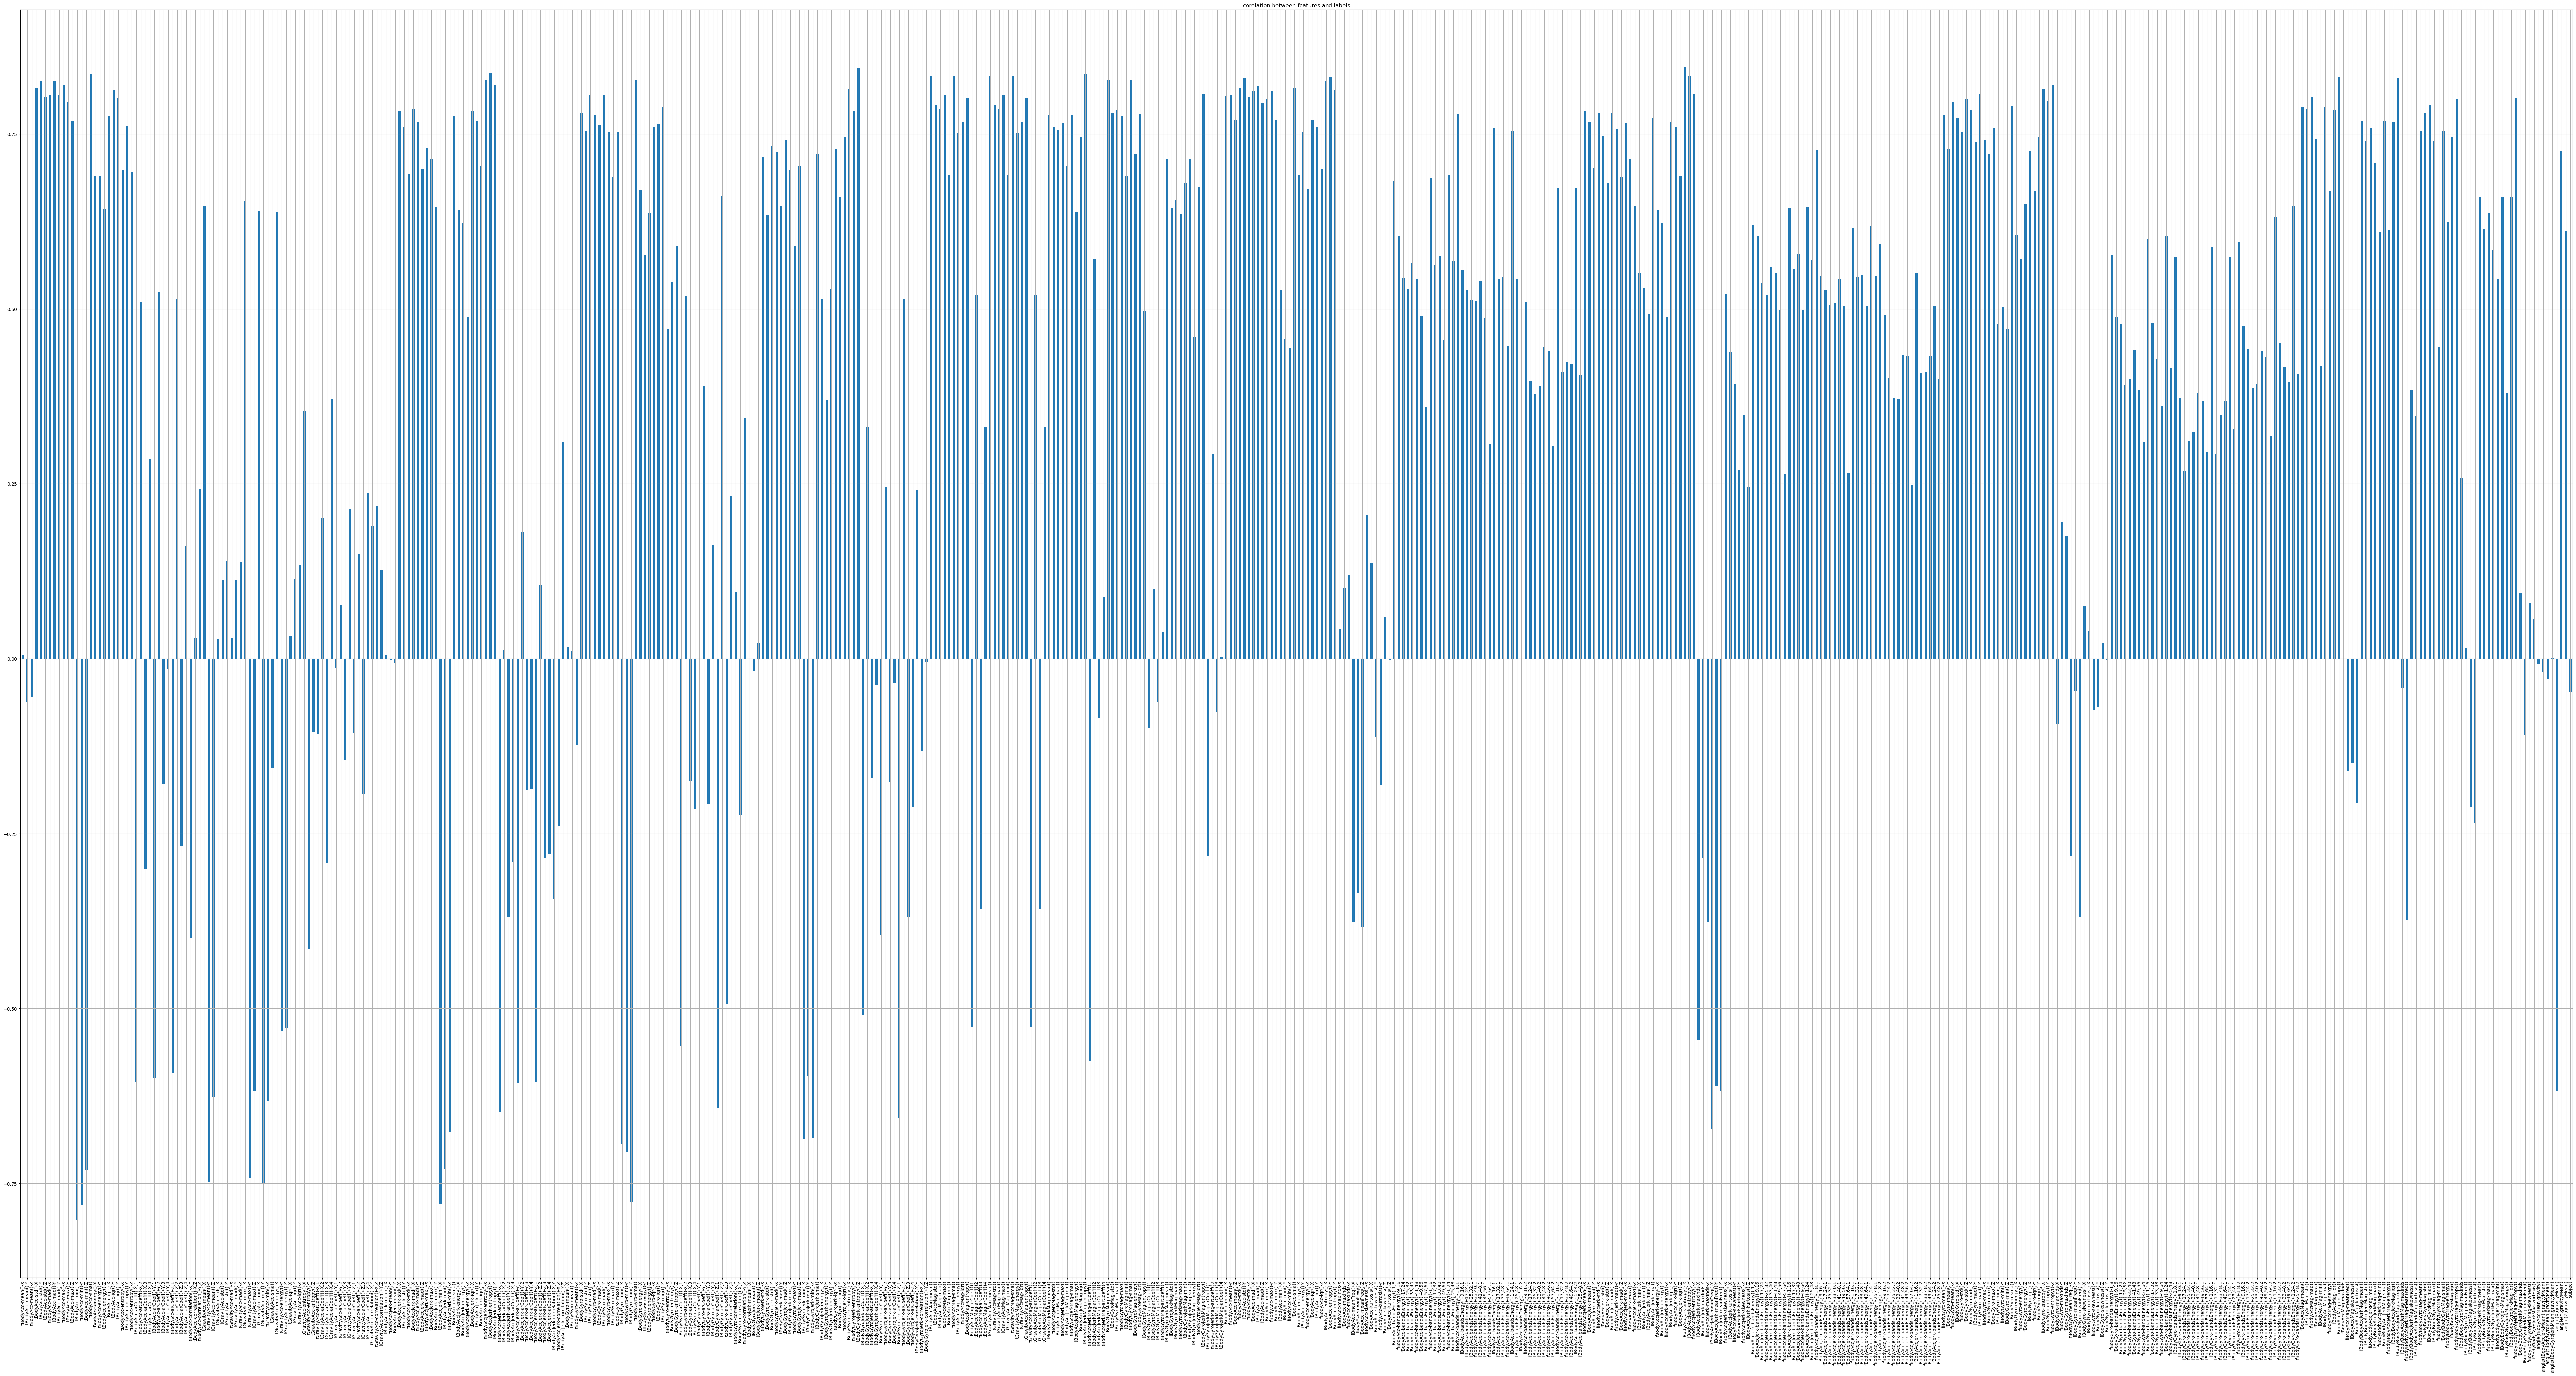

In [123]:
# Correlation between features and label:

# Replacing attrition column values:

df.drop(columns = 'Activity',axis = 1).corrwith(df.Activity).plot(kind='bar',grid=True,figsize=(100,50),title='corelation between features and labels')
plt.show()

In [124]:
# Splitting the Dataset
df = pd.read_csv('test.csv')

# Extract features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model on training data
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Evaluate model on test data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n',confusion)
print('\nClassification Report:\n',classification_rep)

Accuracy: 0.9813559322033898

Confusion Matrix:
 [[106   0   0   0   0   0]
 [  0  95   8   0   0   0]
 [  0   3  93   0   0   0]
 [  0   0   0  97   0   0]
 [  0   0   0   0  83   0]
 [  0   0   0   0   0 105]]

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.97      0.92      0.95       103
          STANDING       0.92      0.97      0.94        96
           WALKING       1.00      1.00      1.00        97
WALKING_DOWNSTAIRS       1.00      1.00      1.00        83
  WALKING_UPSTAIRS       1.00      1.00      1.00       105

          accuracy                           0.98       590
         macro avg       0.98      0.98      0.98       590
      weighted avg       0.98      0.98      0.98       590



In [126]:
# Apply data scaling using StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Perform k-fold cross-validation (e.g., k=5)
k_folds = 5

# Calculate the accuracy using cross_val_score
accuracy = cross_val_score(svm, X_scaled, y,
                             scoring='accuracy', cv=k_folds)

# Print the results
print(f'Cross-Validation accuracy: {accuracy}')

Cross-Validation accuracy: [0.97288136 0.81694915 0.92190153 0.91680815 0.89473684]


In [127]:
# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# Create grid search object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Train model on training data
grid.fit(X_train, y_train)

# Get best parameters
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.9s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.8s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.4s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.6s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ...................

In [128]:
# Get the best parameters from the grid search
best_params = grid.best_params_

In [129]:
# Train SVM model on training data
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# Evaluate model on test data
y_pred = best_svm.predict(X_test)

# Evaluate the model with the best parameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy with Best Parameters: {accuracy}')
print('\nConfusion Matrix:\n',confusion)
print('\nClassification Report:\n',classification_rep)

Accuracy with Best Parameters: 0.9949152542372881

Confusion Matrix:
 [[106   0   0   0   0   0]
 [  0 103   0   0   0   0]
 [  0   3  93   0   0   0]
 [  0   0   0  97   0   0]
 [  0   0   0   0  83   0]
 [  0   0   0   0   0 105]]

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.97      1.00      0.99       103
          STANDING       1.00      0.97      0.98        96
           WALKING       1.00      1.00      1.00        97
WALKING_DOWNSTAIRS       1.00      1.00      1.00        83
  WALKING_UPSTAIRS       1.00      1.00      1.00       105

          accuracy                           0.99       590
         macro avg       1.00      0.99      0.99       590
      weighted avg       1.00      0.99      0.99       590



In [130]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [131]:
# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('\nConfusion Matrix:\n',confusion)
print('\nClassification Report:\n',classification_rep)

Accuracy: 0.9491525423728814

Confusion Matrix:
 [[106   0   0   0   0   0]
 [  0  92  11   0   0   0]
 [  0   3  93   0   0   0]
 [  0   0   0  94   1   2]
 [  0   0   0   2  79   2]
 [  0   0   0   3   6  96]]

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.97      0.89      0.93       103
          STANDING       0.89      0.97      0.93        96
           WALKING       0.95      0.97      0.96        97
WALKING_DOWNSTAIRS       0.92      0.95      0.93        83
  WALKING_UPSTAIRS       0.96      0.91      0.94       105

          accuracy                           0.95       590
         macro avg       0.95      0.95      0.95       590
      weighted avg       0.95      0.95      0.95       590



In [132]:
# Define the parameter grid for GridSearchCV
param_grid_df = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_df,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [133]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

print(f'Best Parameters: {best_params}')

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [134]:
# Train a Decision Tree Classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model with the best parameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy with Best Parameters: {accuracy}')
print('\nConfusion Matrix:\n',confusion)
print('\nClassification Report:\n',classification_rep)

Accuracy with Best Parameters: 0.9542372881355933

Confusion Matrix:
 [[106   0   0   0   0   0]
 [  0  93  10   0   0   0]
 [  0   5  91   0   0   0]
 [  0   0   0  94   1   2]
 [  0   0   0   1  82   0]
 [  0   0   0   4   4  97]]

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.95      0.90      0.93       103
          STANDING       0.90      0.95      0.92        96
           WALKING       0.95      0.97      0.96        97
WALKING_DOWNSTAIRS       0.94      0.99      0.96        83
  WALKING_UPSTAIRS       0.98      0.92      0.95       105

          accuracy                           0.95       590
         macro avg       0.95      0.96      0.95       590
      weighted avg       0.95      0.95      0.95       590



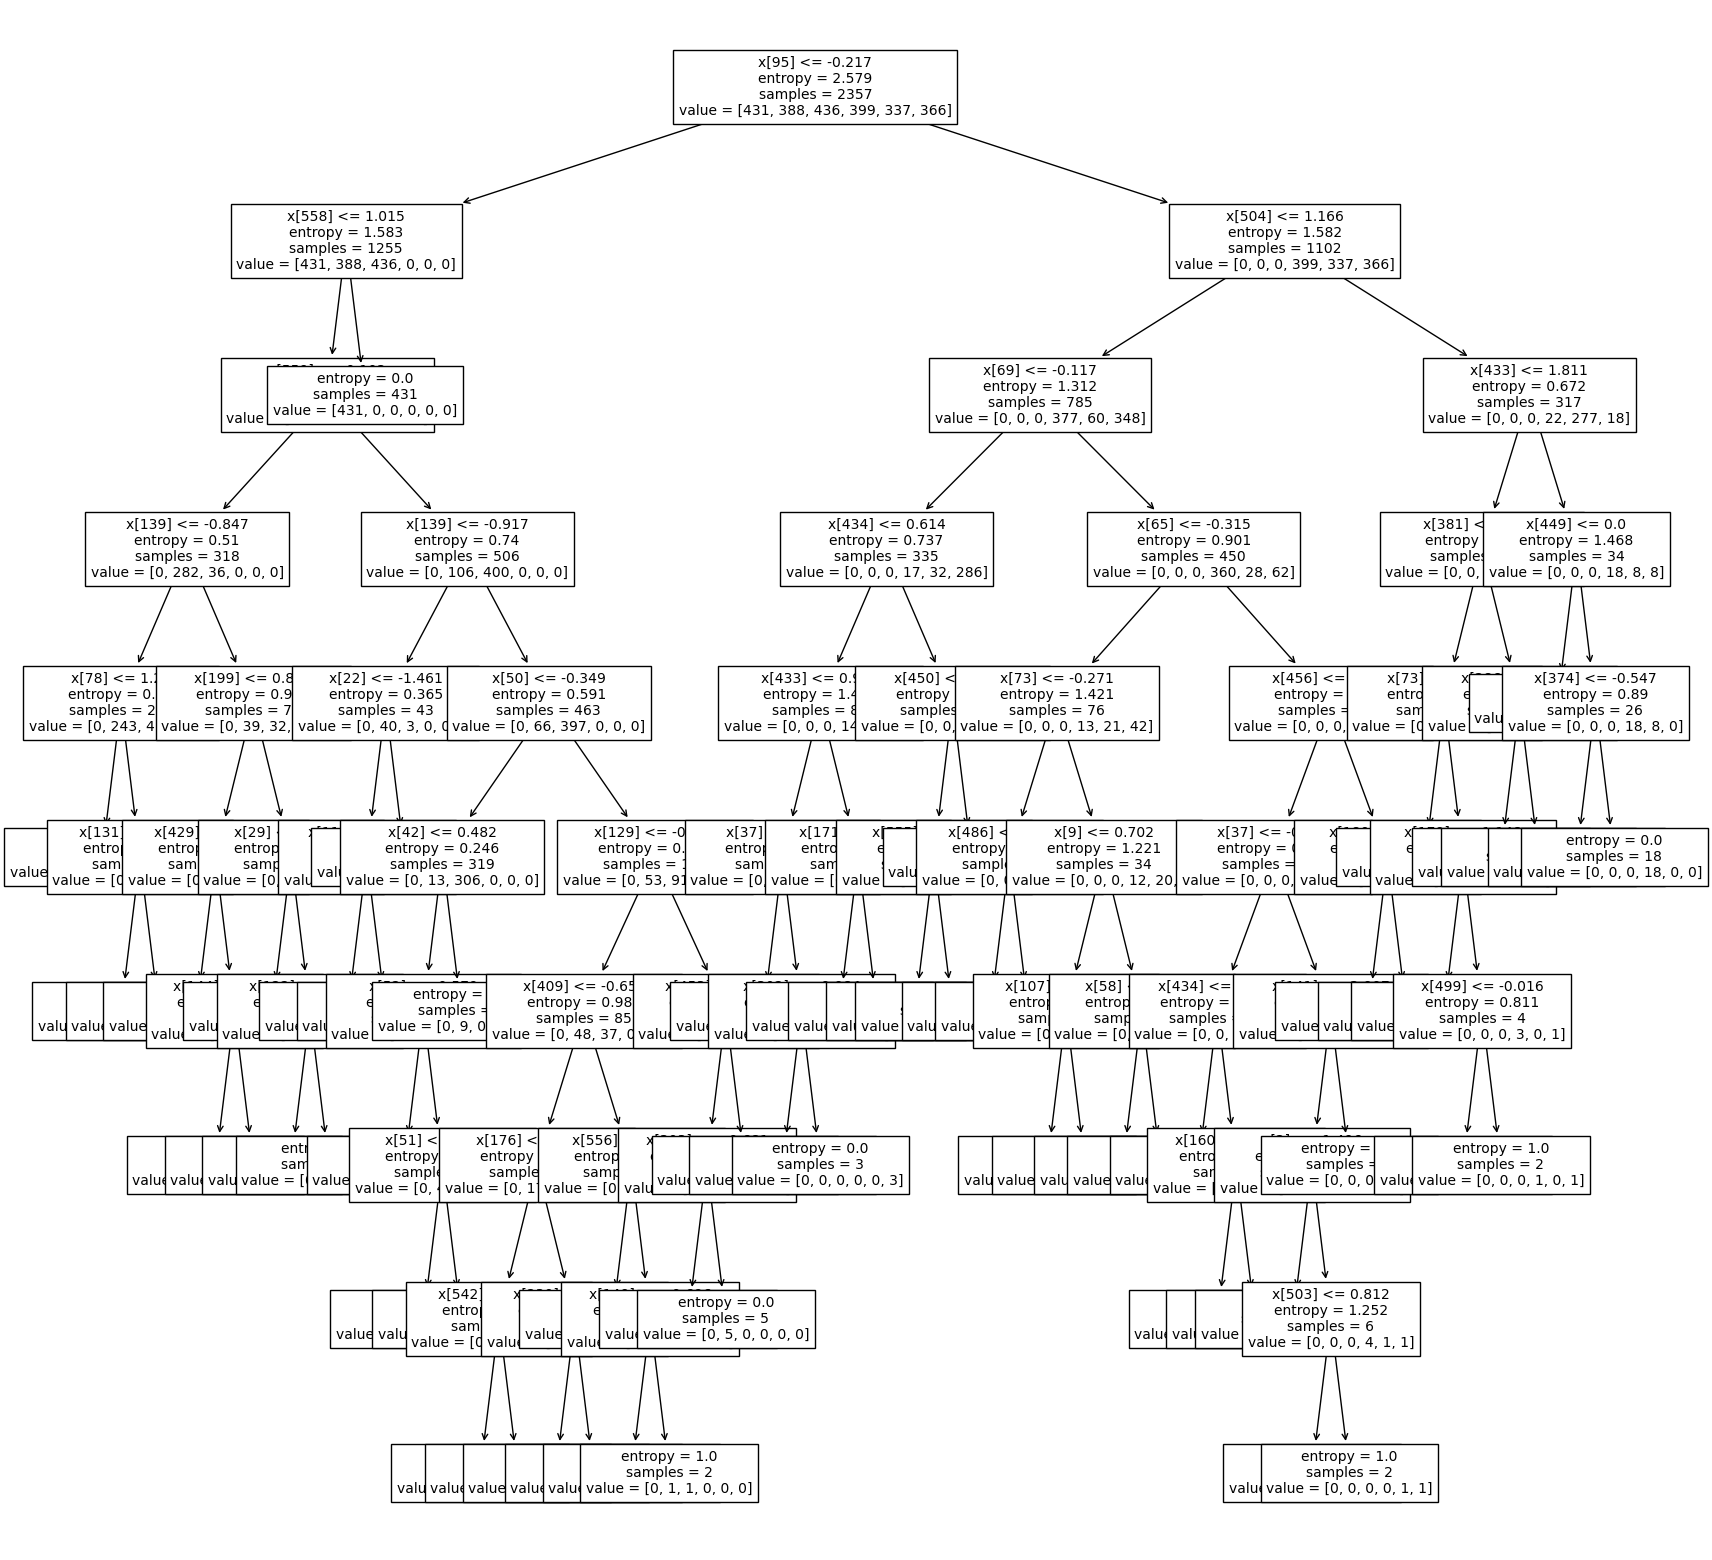

In [135]:
# plot tree
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(best_dt_classifier, fontsize=10)
plt.show()

In [136]:
# Train a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)  

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('\nConfusion Matrix:\n',confusion)
print('\nClassification Report:\n',classification_rep)

Accuracy: 0.9830508474576272

Confusion Matrix:
 [[106   0   0   0   0   0]
 [  0  98   5   0   0   0]
 [  0   2  94   0   0   0]
 [  0   0   0  96   1   0]
 [  0   0   0   0  81   2]
 [  0   0   0   0   0 105]]

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.98      0.95      0.97       103
          STANDING       0.95      0.98      0.96        96
           WALKING       1.00      0.99      0.99        97
WALKING_DOWNSTAIRS       0.99      0.98      0.98        83
  WALKING_UPSTAIRS       0.98      1.00      0.99       105

          accuracy                           0.98       590
         macro avg       0.98      0.98      0.98       590
      weighted avg       0.98      0.98      0.98       590



In [137]:
# Cross validation 
model = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation (e.g., k=5)
k_folds = 5

# Calculate the accuracy using cross_val_score
acc_scores = cross_val_score(model, X, y,
                             scoring='accuracy', cv=k_folds)

# Print the results
print(f'Cross-Validation accuracy: {acc_scores}')

Cross-Validation accuracy: [0.93898305 0.85762712 0.92529711 0.88624788 0.93548387]


In [138]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [139]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [140]:
# Train a Random Forest Classifier with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model with the best parameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('\nConfusion Matrix:\n',confusion)
print('\nClassification Report:\n',classification_rep)

Accuracy: 0.9830508474576272

Confusion Matrix:
 [[106   0   0   0   0   0]
 [  0  98   5   0   0   0]
 [  0   2  94   0   0   0]
 [  0   0   0  96   1   0]
 [  0   0   0   0  81   2]
 [  0   0   0   0   0 105]]

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       106
           SITTING       0.98      0.95      0.97       103
          STANDING       0.95      0.98      0.96        96
           WALKING       1.00      0.99      0.99        97
WALKING_DOWNSTAIRS       0.99      0.98      0.98        83
  WALKING_UPSTAIRS       0.98      1.00      0.99       105

          accuracy                           0.98       590
         macro avg       0.98      0.98      0.98       590
      weighted avg       0.98      0.98      0.98       590



Here we can see that after hyperparamter tuning accuracy remains the same which indicates that baseline model of random forest classifier is adequate for classification.

In [141]:
# 
y_test , y_pred

(array(['WALKING', 'STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'LAYING',
        'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS',
        'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING',
        'LAYING', 'WALKING', 'LAYING', 'WALKING_DOWNSTAIRS', 'LAYING',
        'WALKING_UPSTAIRS', 'WALKING', 'LAYING', 'WALKING_UPSTAIRS',
        'SITTING', 'STANDING', 'SITTING', 'WALKING_DOWNSTAIRS', 'SITTING',
        'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'SITTING',
        'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING', 'STANDING',
        'WALKING_DOWNSTAIRS', 'SITTING', 'WALKING_DOWNSTAIRS',
        'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING', 'STANDING', 'STANDING',
        'LAYING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING_UPSTAIRS',
        'STANDING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'LAYING',
        'LAYING', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING',
        'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'LAYING', 'SITTING',
        'SITTING', 

In [142]:
result = pd.DataFrame(data={'Predictions': y_pred, 'Actual': y_test})
result

,Predictions,Actual
0,WALKING,WALKING
1,STANDING,STANDING
2,WALKING_UPSTAIRS,WALKING_UPSTAIRS
3,LAYING,LAYING
4,LAYING,LAYING
...,...,...
585,SITTING,SITTING
586,WALKING_UPSTAIRS,WALKING_UPSTAIRS
587,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS
588,SITTING,SITTING


[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.983 total time=   2.6s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=300;, score=0.985 total time=   7.9s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=200;, score=0.979 total time=   5.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=10, n_estimators=100;, score=0.983 total time=   2.7s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=10, n_estimators=200;, score=0.949 total time=   5.2s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=10, n_estimators=300;, score=0.979 total time=   8.3s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=300;, score=0.934 total time=   5.7s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=200;, score=0.934 total time=   3.6s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=10, n_estimator

[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.975 total time=   2.5s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=200;, score=0.981 total time=   5.2s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=100;, score=0.989 total time=   2.5s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=200;, score=0.964 total time=   5.2s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=300;, score=0.985 total time=   7.9s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=10, n_estimators=300;, score=0.987 total time=   8.3s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=300;, score=0.909 total time=   5.7s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=200;, score=0.947 total time=   3.6s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=5, n_estimators=3

[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=200;, score=0.987 total time=   5.2s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=100;, score=0.962 total time=   2.6s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=100;, score=0.985 total time=   2.6s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=200;, score=0.987 total time=   5.2s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=10, n_estimators=100;, score=0.951 total time=   2.6s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=10, n_estimators=100;, score=0.981 total time=   2.6s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=10, n_estimators=200;, score=0.981 total time=   5.4s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.932 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2, n_estimat

# Conclusion

Therefore, After comparing and evaluating the model with best parameters SVM classifier provided the most accuracy with 99.49% and making it the optimal model for human activity recognition with sensor data.